In [5]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [6]:
#Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
#Twitter API Keys
#from config import consumer_key, consumer_secret, access_token, access_token_secret
consumer_key = "c8iPOfqAcm1qys97q3RW0wKOM"
consumer_secret = "6sUoqS7FtJkIKTfdoWaZHEf5quOEeqAfrJLsSJMzJd2Aw1myoF"
access_token = "229598666-EnGXtgqnFXT8zjHrMTI7medln9PlPdT5thbQhjJh"
access_token_secret = "Bdr3ujJgJqgf6wksE2b8OQ7CxkFTCAi5KolqLZrc9giNH"

In [15]:
#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#Target Search Term of the various Media channels
Media_users = ("@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes")

#Array to hold sentiment
Sentiment_array = []

#Extracting the first 100 tweets in each Media Channel

for user in Media_users:
    #Setting the tweet count as 100
    tweetcount=100
    #print("Start tweets from %s"%user)
    
    # Extracting 5 pages of tweets
    for x in range(5):
        public_tweets=api.user_timeline(user,page=x)
        #For each tweet 
        for tweet in public_tweets:
            #Calculating the compound,positive,negative and neutral value for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Store Tweet in Array
            Sentiment_array.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":tweetcount})
            #Decreasing tweet count by 1
            tweetcount-=1

In [31]:
#Creating a dataframe from the Sentiment Array
Sentiment_DF=pd.DataFrame.from_dict(Sentiment_array)
#Removing the '@' from Media column in the data frame
Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))

#Re_arranging the order of columns before saving into CSV file
Sentiment_DF=Sentiment_DF[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]

#Storing into a CSV File
Sentiment_DF.to_csv("Media_SentimentAnalysis.csv")

Sentiment_DF.head(10)

,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,BBC,Wed Mar 07 19:12:02 +0000 2018,'Harry was looking at his family for the first...,0.0000,0.000,0.0,1.000,100
1,BBC,Wed Mar 07 18:23:04 +0000 2018,✂️ ‘My hair is a symbol of pride.’\n\n💇🏽💇🏿💇🏾 S...,0.0000,0.000,0.0,1.000,99
2,BBC,Wed Mar 07 17:42:01 +0000 2018,The little mouse that inspired Pikachu is actu...,0.4987,0.264,0.0,0.736,98
3,BBC,Wed Mar 07 17:27:29 +0000 2018,RT @BBCTwo: If you haven't seen #ACSVersace ye...,0.0000,0.000,0.0,1.000,97
4,BBC,Wed Mar 07 17:22:51 +0000 2018,RT @BBCBreakfast: In many ways Hedy Lamarr was...,0.0000,0.000,0.0,1.000,96
5,BBC,Wed Mar 07 17:22:23 +0000 2018,RT @BBCScotlandNews: A Scottish school has won...,0.8555,0.370,0.0,0.630,95
6,BBC,Wed Mar 07 17:16:45 +0000 2018,RT @bbceurovision: A storm is coming.@surieoff...,0.0000,0.000,0.0,1.000,94
7,BBC,Wed Mar 07 17:14:49 +0000 2018,RT @BBCTwo: Nostalgia heaven! How many of thes...,0.5562,0.183,0.0,0.817,93
8,BBC,Wed Mar 07 17:13:49 +0000 2018,📖 Time to 'embiggen' your vocabulary.\n\nA new...,0.0000,0.000,0.0,1.000,92
9,BBC,Wed Mar 07 16:15:06 +0000 2018,RT @bbccomedy: WOOF! ❤️#RikMayallDay https://t...,0.0000,0.000,0.0,1.000,91


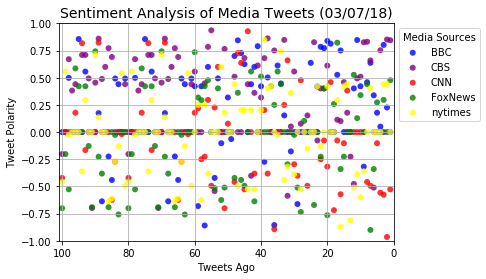

In [24]:
#Creating an array with the unique Media sources in the data frame
Media_Source=Sentiment_DF["Media"].unique()

#Plotting the graph for each media source
for media in Media_Source:
    # Creating a temporary data frame to store for only one media channel at a time
    Temp_DF=Sentiment_DF[Sentiment_DF["Media"]==media]
    plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=Temp_DF.Media.map({"BBC": "blue", "CBS" : "purple",  "CNN": 'red',
                                              "FoxNews":"green","nytimes":"yellow"}))


#plt.hlines(0,0,np.arange(len(Sentiment_DF["Compound"])),alpha=1)
#Setting the legend 
plt.legend(bbox_to_anchor = (1,1),title="Media Sources")
#Setting the title,x_axis and y_axis labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
#Setting the x_axis and y_axis limits
plt.xlim(101,0)
plt.ylim(-1,1)
#Setting the grid
plt.grid(True)

#Saving the figue
plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches='tight')

plt.show()

In [22]:
#Calculating the mean for each Media channel and storing to a dataframe
Media_Compound_Means=Sentiment_DF.groupby("Media").mean()["Compound"].to_frame()
#Resetting the index 
Media_Compound_Means.reset_index(inplace=True)

Media_Compound_Means

,Media,Compound
0,BBC,0.190192
1,CBS,0.300487
2,CNN,-0.043570
3,FoxNews,-0.031852
4,nytimes,-0.009911


In [29]:
# Setting the x_axis and y-axis value
x_axis=Media_Compound_Means.index.values
y_axis=Media_Compound_Means["Compound"]

# Intializing the plots
fig,ax=plt.subplots()

#Setting the plot and assigning the color 
bars=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1,
            edgecolor='black',color=["green","purple","red","blue","yellow"])

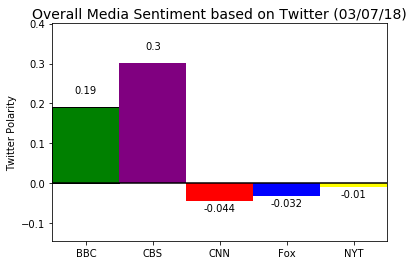

In [30]:
#Setting the ticks for the bar graph
tick_locations = [value+0.5 for value in range(len(x_axis))]
plt.xticks(tick_locations,["BBC","CBS","CNN","Fox","NYT"])

#Setting the text label in the bar graph
#If value is positive then put True in the Summary else place False, for changing the color based on the value
Media_Compound_Means["Positive"]=Media_Compound_Means["Compound"]>0
#Assign the height based on whether it is a  positive value
height = Media_Compound_Means.Positive.map({True: 0.03 , False: -0.03})
#Setting the value label on the each bar
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+height[bars.index(bar)],
            round(Media_Compound_Means["Compound"][bars.index(bar)],3),ha='center', va='bottom')


#Setting the x_axis limits
ax.set_xlim(0, len(x_axis))
#Setting the y_axis limits dynamically by finding the maximum and minimum value in y-axis
ax.set_ylim(min(y_axis)-0.1, max(y_axis)+0.1)

#Setting a horizontal line at y=0
plt.hlines(0,0,len(x_axis))

#Setting the title of the graph
ax.set_title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")), fontsize=14)
#Setting the y_axis label
ax.set_ylabel("Twitter Polarity")

#Saving the graph
plt.savefig("Overall_Media_Sentiment_based_on_Twitter.png", bbox_inches='tight')
plt.show()